In [ ]:
import concurrent.futures
import numpy as np
import matplotlib.pyplot as plt
import time

#iteraciones: numero de puntos aleatorios a generar en el cuadrado
def calculo_puntos_circulo(iteraciones):
  #Puntos generados aleatoriamente en el intervalo [-1,1] para x e y
  x = np.random.uniform(-1,1,iteraciones)
  y = np.random.uniform(-1,1,iteraciones)

  #Calculo de la distancia de cada punto al origen y
  #se cuentan cuantos caen dentro del diametro del circulo
  puntos_dentro_circulo = np.sum(x**2+y**2<=1)
  return puntos_dentro_circulo

Se generan una serie de puntos aleatorios dentro de un cuadrado de 2 x 2 centrado en el origen. Calcula el numero de puntos que caen dentro del circulo de radio 1 centrado en el origen. La razon entre los puntos dentro del circulo y el total de puntos genrados nos permite calcular una aproximacion de π.

In [ ]:
# Función para calcular los puntos dentro del círculo y devolver las coordenadas de los puntos generados
def calculo_puntos_circulo(iteraciones):
    # Puntos generados aleatoriamente en el intervalo [-1,1] para x e y
    x = np.random.uniform(-1, 1, iteraciones)
    y = np.random.uniform(-1, 1, iteraciones)

    # Se calcula cuántos puntos caen dentro del círculo
    puntos_dentro_circulo = (x**2 + y**2 <= 1)

    return x, y, puntos_dentro_circulo  # Devolvemos las coordenadas x, y y los puntos dentro del círculo

# Iteraciones: número de puntos aleatorios a generar en el cuadrado
# Procesos: número de procesos en paralelo a utilizar
def aproximacion_pi(iteraciones, procesos):
    iteracion_por_proceso = iteraciones // procesos

    # Medir el tiempo de inicio
    inicio = time.time()

    # Usamos concurrent.futures para ejecución en paralelo
    with concurrent.futures.ProcessPoolExecutor() as executor:
        resultados = executor.map(calculo_puntos_circulo, [iteracion_por_proceso] * procesos)

    # Graficar los puntos
    plt.figure(figsize=(6, 6))

    # Obtener puntos de todos los procesos
    plt.gca().set_aspect('equal', adjustable='box')

    # Listas para almacenar las coordenadas de todos los puntos
    x_totales = []
    y_totales = []
    puntos_dentro_circulo_totales = []

    for resultado in resultados:
        x, y, puntos_dentro_circulo = resultado
        x_totales.extend(x)  # Añadir las coordenadas x de este proceso
        y_totales.extend(y)  # Añadir las coordenadas y de este proceso
        puntos_dentro_circulo_totales.extend(puntos_dentro_circulo)  # Guardar si cada punto está dentro del círculo

        # Graficar los puntos, coloreando según si están dentro del círculo
        plt.scatter(x, y, c=np.where(puntos_dentro_circulo, 'green', 'red'), s=1)

    # Graficar el círculo
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Establecer límites de la gráfica
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.title(f"Aproximación de PI: {4 * np.sum(puntos_dentro_circulo_totales) / iteraciones}")
    plt.show()

    # Calcular el valor de PI aproximado
    puntos_dentro_circulo = np.sum(puntos_dentro_circulo_totales)
    pi_aproximado = 4 * puntos_dentro_circulo / iteraciones

    # Calcular error relativo
    pi_teorico = np.pi
    error_relativo = abs((pi_aproximado - pi_teorico) / pi_teorico) * 100

     # Medir el tiempo final
    fin = time.time()
    tiempo_ejecucion = fin - inicio

    return pi_aproximado, tiempo_ejecucion, error_relativo

Se distribuyen el numero total de iteraciones (puntos) entre varios procesos. Luego se hace:
* Division de trabajo: el numero total de iteraciones se divide equitativamente entre los procesos.
* Ejecucion paralela: La funcion ```concurrent.futures.ProcessPoolExecutor()``` crea un grupo de procesos y ejecuta ```calcular_puntos_circulo``` en paralelo para cada subconjunto de puntos.
* Suma de resultados: Una vez que cada proceso devuelve su cuenta de puntps dentro del circulo, estos se suman.
* Calculo de π: Usando la formula π ≈ 4 x $\frac{\ PuntosDentroDelCirculo}{PuntosTotales}$, se obtiene la aproximacion de π.


---



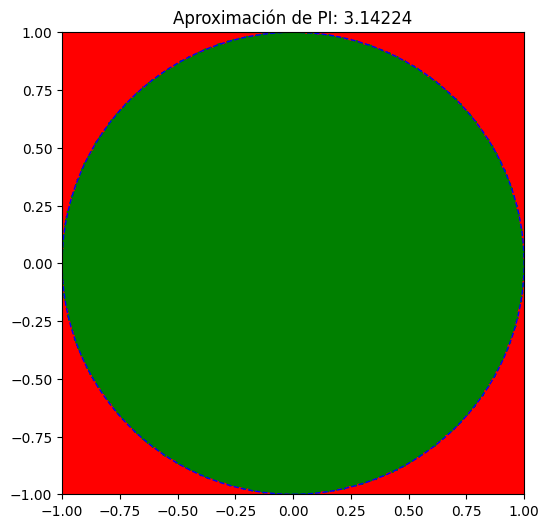

Valor aproximado de PI: 3.142240000000000
Tiempo de ejecución: 19.5189 segundos
Error relativo: 0.020606 %


In [ ]:
# Parámetros de entrada
total_iteraciones = 10**6
total_procesos = 4  #Cantidad de procesos en paralelo a utilizar

#Aproximacion de PI usando Monte Carlo en paralelo
pi, tiempo, error = aproximacion_pi(total_iteraciones, total_procesos)

# Mostrar resultados
print(f"Valor aproximado de PI: {pi:.15f}")  # Mostrar hasta 10 decimales
print(f"Tiempo de ejecución: {tiempo:.4f} segundos")
print(f"Error relativo: {error:.6f} %")

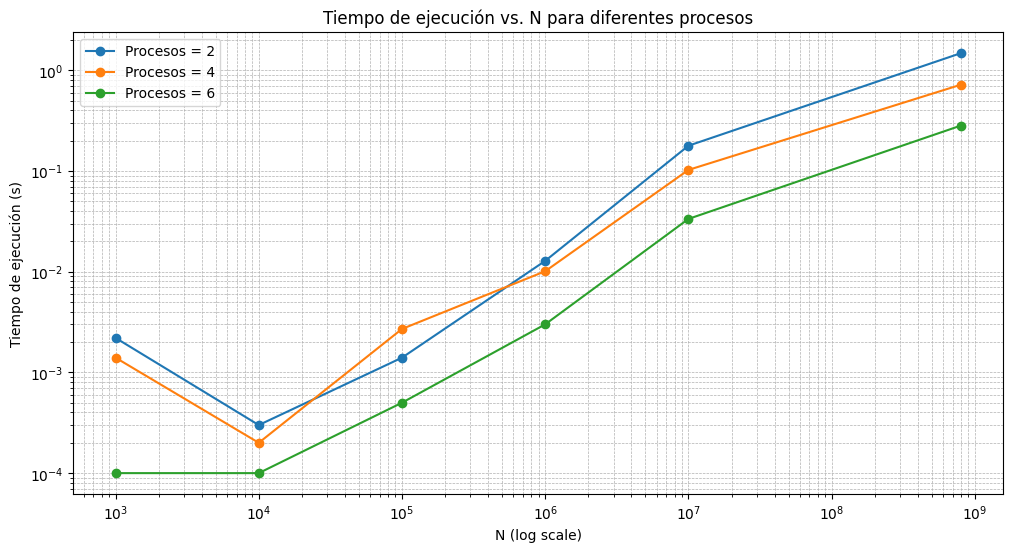

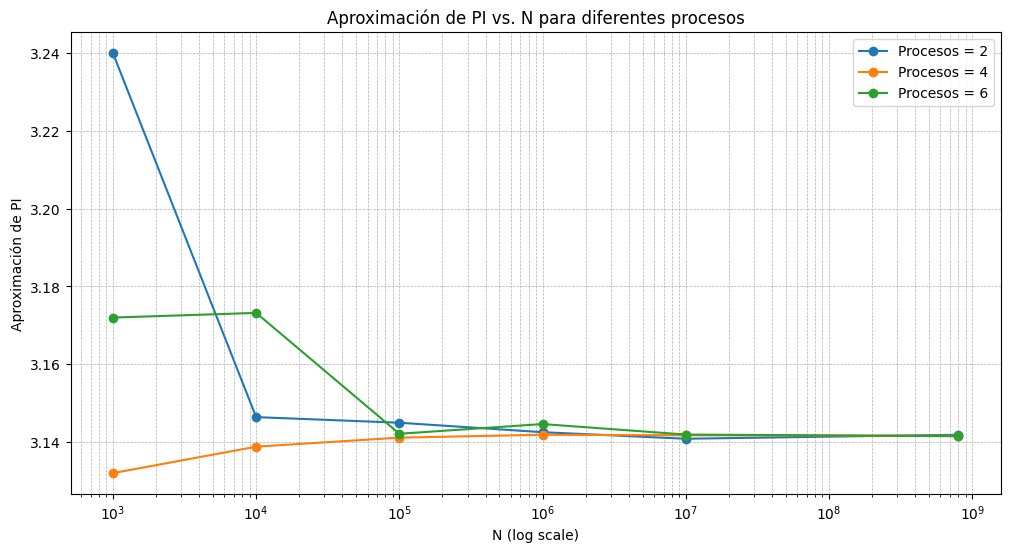

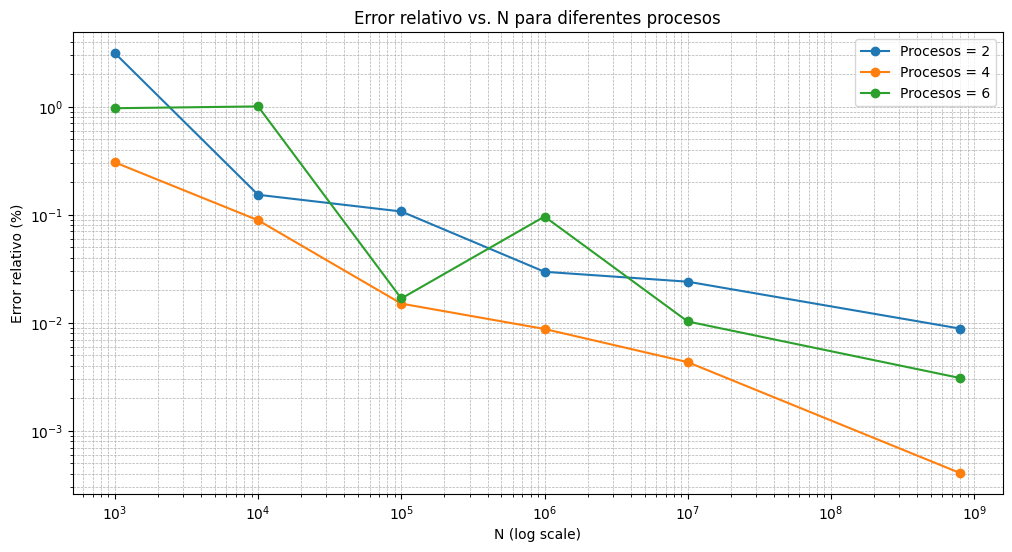

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para los diferentes números de procesos
procesos = [2, 4, 6]

# Valores de N
N_valores = [1e3, 1e4, 1e5, 1e6, 1e7, 8e8]

# Tiempos de ejecución (segundos)
tiempos = [
    [0.0022, 0.0003, 0.0014, 0.0128, 0.1780, 1.4781],  # Procesos = 2
    [0.0014, 0.0002, 0.0027, 0.0101, 0.1024, 0.7186],  # Procesos = 4
    [0.0001, 0.0001, 0.0005, 0.0030, 0.0334, 0.2823],  # Procesos = 6
]

# Aproximaciones de PI
aproximaciones = [
    [3.2400, 3.1464, 3.14496, 3.142524, 3.1408384, 3.14187],  # Procesos = 2
    [3.1320, 3.1388, 3.14112, 3.141868, 3.1417284, 3.1416054],  # Procesos = 4
    [3.1720, 3.1732, 3.14212, 3.144616, 3.1419156, 3.14149595],  # Procesos = 6
]

# Errores relativos (%)
errores = [
    [3.132403, 0.153023, 0.107186, 0.029646, 0.024009, 0.008828],  # Procesos = 2
    [0.305344, 0.088893, 0.015045, 0.008765, 0.004321, 0.000406],  # Procesos = 4
    [0.967896, 1.006093, 0.016786, 0.096236, 0.010280, 0.003078],  # Procesos = 6
]

# Gráfico del tiempo de ejecución
plt.figure(figsize=(12, 6))
for i, proceso in enumerate(procesos):
    plt.plot(N_valores, tiempos[i], marker='o', label=f'Procesos = {proceso}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución vs. N para diferentes procesos')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Gráfico de la aproximación de PI
plt.figure(figsize=(12, 6))
for i, proceso in enumerate(procesos):
    plt.plot(N_valores, aproximaciones[i], marker='o', label=f'Procesos = {proceso}')
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Aproximación de PI')
plt.title('Aproximación de PI vs. N para diferentes procesos')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Gráfico del error relativo
plt.figure(figsize=(12, 6))
for i, proceso in enumerate(procesos):
    plt.plot(N_valores, errores[i], marker='o', label=f'Procesos = {proceso}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Error relativo (%)')
plt.title('Error relativo vs. N para diferentes procesos')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


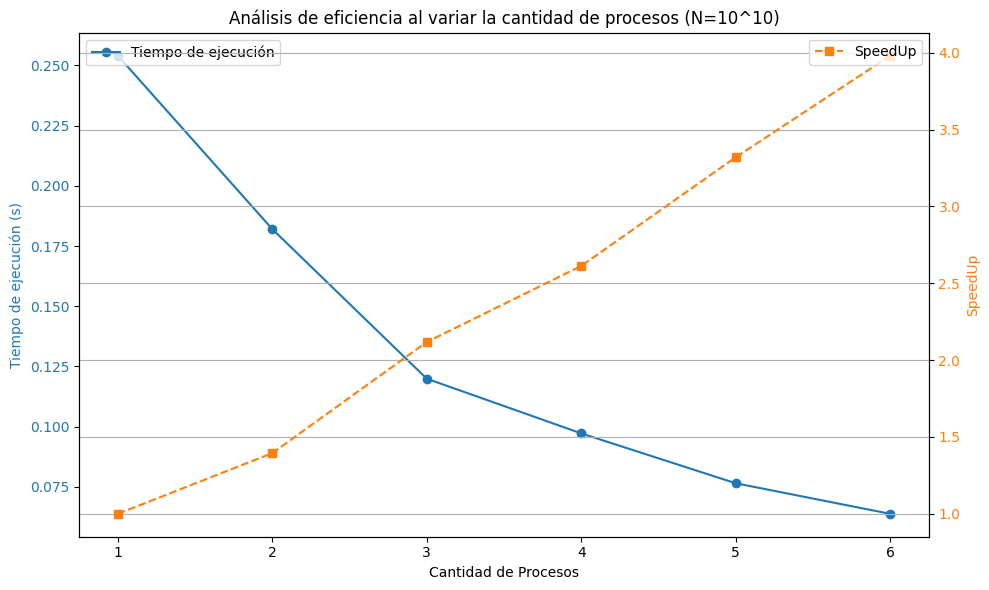

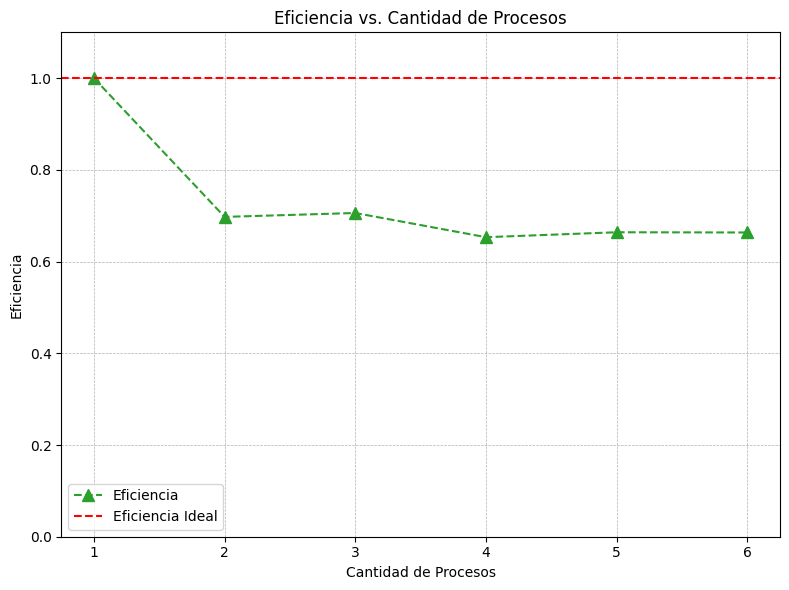

In [ ]:
import matplotlib.pyplot as plt

# Datos
procesos = [1, 2, 3, 4, 5, 6]
tiempos = [0.2540, 0.1820, 0.1199, 0.0972, 0.0765, 0.0638]
speedup = [1, 1.395, 2.118, 2.613, 3.320, 3.981]

# Calcular la eficiencia
eficiencia = [s / p for s, p in zip(speedup, procesos)]  # Eficiencia = SpeedUp / Procesos

# Creación de la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar el tiempo de ejecución
color = 'tab:blue'
ax1.set_xlabel('Cantidad de Procesos')
ax1.set_ylabel('Tiempo de ejecución (s)', color=color)
ax1.plot(procesos, tiempos, 'o-', color=color, label='Tiempo de ejecución')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Crear un segundo eje para el SpeedUp
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('SpeedUp', color=color)
ax2.plot(procesos, speedup, 's--', color=color, label='SpeedUp')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Títulos y leyendas
plt.title('Análisis de eficiencia al variar la cantidad de procesos (N=10^10)')
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Gráfico 2: Eficiencia
plt.figure(figsize=(8, 6))
plt.plot(procesos, eficiencia, '^--', color='tab:green', label='Eficiencia', markersize=8)
plt.xlabel('Cantidad de Procesos')
plt.ylabel('Eficiencia')
plt.title('Eficiencia vs. Cantidad de Procesos')
plt.ylim(0, 1.1)  # Limitar el eje y a 1.1 para enfatizar que la eficiencia máxima es 1
plt.axhline(y=1, color='red', linestyle='--', label='Eficiencia Ideal')  # Línea de referencia para la eficiencia ideal
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


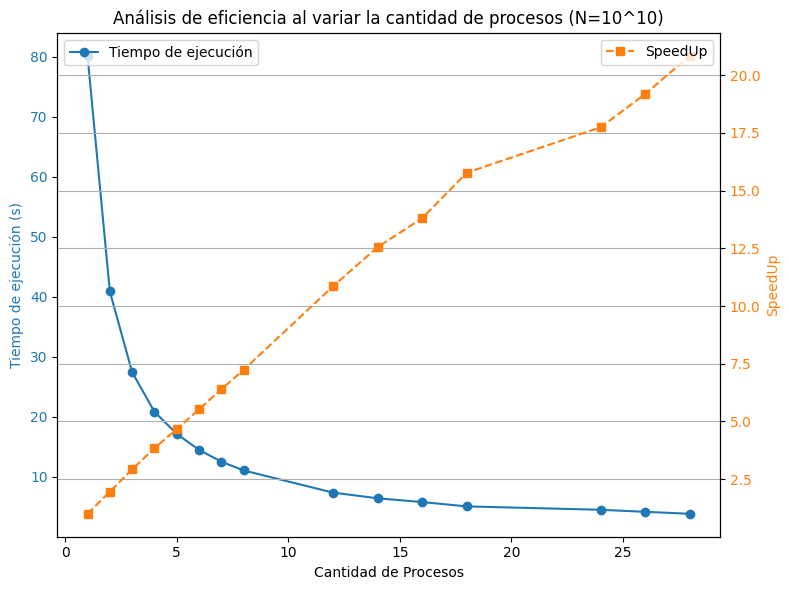

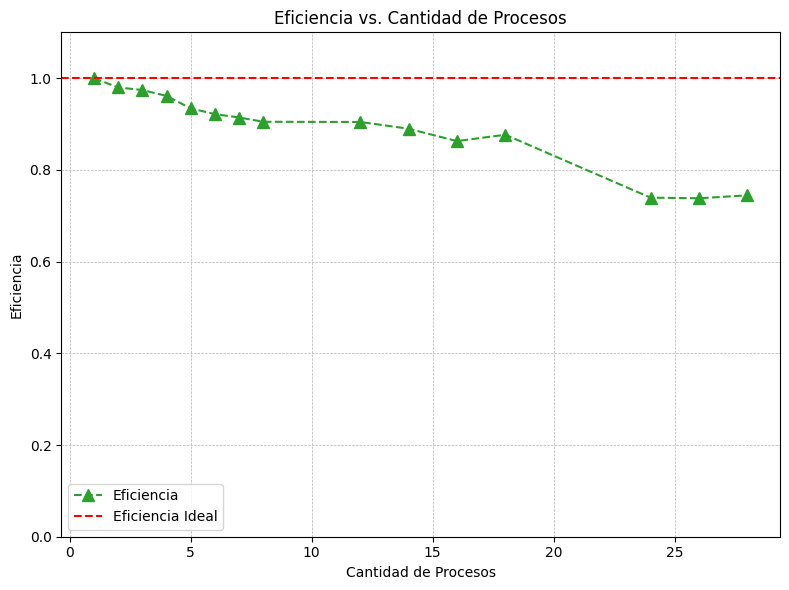

In [ ]:
import matplotlib.pyplot as plt

# Datos
procesos = [1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 16, 18, 24, 26, 28]
tiempos = [80.2071, 40.9269, 27.4455, 20.8579, 17.1720, 14.5046, 12.5327,
           11.0790, 7.3894, 6.4384, 5.8100, 5.0828, 4.5196, 4.1795, 3.8473]
speedup = [1, 1.959, 2.922, 3.845, 4.671, 5.529, 6.399, 7.239,
           10.854, 12.553, 13.805, 15.780, 17.746, 19.191, 20.847]

# Creación de la figura y los ejes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Graficar el tiempo de ejecución
color = 'tab:blue'
ax1.set_xlabel('Cantidad de Procesos')
ax1.set_ylabel('Tiempo de ejecución (s)', color=color)
ax1.plot(procesos, tiempos, 'o-', color=color, label='Tiempo de ejecución')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Crear un segundo eje para el SpeedUp
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('SpeedUp', color=color)
ax2.plot(procesos, speedup, 's--', color=color, label='SpeedUp')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# Títulos y leyendas
plt.title('Análisis de eficiencia al variar la cantidad de procesos (N=10^10)')
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Gráfico 2: Eficiencia
plt.figure(figsize=(8, 6))
plt.plot(procesos, eficiencia, '^--', color='tab:green', label='Eficiencia', markersize=8)
plt.xlabel('Cantidad de Procesos')
plt.ylabel('Eficiencia')
plt.title('Eficiencia vs. Cantidad de Procesos')
plt.ylim(0, 1.1)  # Limitar el eje y a 1.1 para enfatizar que la eficiencia máxima es 1
plt.axhline(y=1, color='red', linestyle='--', label='Eficiencia Ideal')  # Línea de referencia para la eficiencia ideal
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()